### Importación de datos



In [2]:
import pandas as pd
import matplotlib.pyplot as plt

url = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_1%20.csv"
url2 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_2.csv"
url3 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_3.csv"
url4 = "https://raw.githubusercontent.com/alura-es-cursos/challenge1-data-science-latam/refs/heads/main/base-de-datos-challenge1-latam/tienda_4.csv"

tienda = pd.read_csv(url)
tienda2 = pd.read_csv(url2)
tienda3 = pd.read_csv(url3)
tienda4 = pd.read_csv(url4)

tienda.head()

,Producto,Categoría del Producto,Precio,Costo de envío,Fecha de Compra,Vendedor,Lugar de Compra,Calificación,Método de pago,Cantidad de cuotas,lat,lon
0,Asistente virtual,Electrónicos,164300.0,6900.0,16/01/2021,Pedro Gomez,Bogotá,4,Tarjeta de crédito,8,4.60971,-74.08175
1,Mesa de comedor,Muebles,192300.0,8400.0,18/05/2022,Beatriz Morales,Medellín,1,Tarjeta de crédito,4,6.25184,-75.56359
2,Juego de mesa,Juguetes,209600.0,15900.0,15/03/2021,Juan Fernandez,Cartagena,1,Tarjeta de crédito,1,10.39972,-75.51444
3,Microondas,Electrodomésticos,757500.0,41000.0,03/05/2022,Juan Fernandez,Cali,4,Nequi,1,3.43722,-76.52250
4,Silla de oficina,Muebles,335200.0,20200.0,07/11/2020,Maria Alfonso,Medellín,5,Nequi,1,6.25184,-75.56359


#1. Análisis de facturación



In [5]:
# Agrupamos las tiendas en una lista
tiendas = [tienda, tienda2, tienda3, tienda4]

# Extraemos en un diccionario el ingreso total de cada tienda
ingreso_total_por_tienda = {"Tienda " + str(index): float(round(t["Precio"].sum(), 2)) for index,t in enumerate(tiendas, start=1)}
ingreso_total_por_tienda

{'Tienda 1': 1150880400.0,
 'Tienda 2': 1116343500.0,
 'Tienda 3': 1098019600.0,
 'Tienda 4': 1038375700.0}

In [ ]:
# Convertimos el diccionario en un data frame y lo visualizamos
df_ingresos = pd.DataFrame.from_dict({"Tiendas":ingreso_total_por_tienda.keys(), "Ingreso Total": ingreso_total_por_tienda.values()})
df_ingresos

,Tiendas,Ingreso Total
0,Tienda 1,1.150880e+09
1,Tienda 2,1.116344e+09
2,Tienda 3,1.098020e+09
3,Tienda 4,1.038376e+09


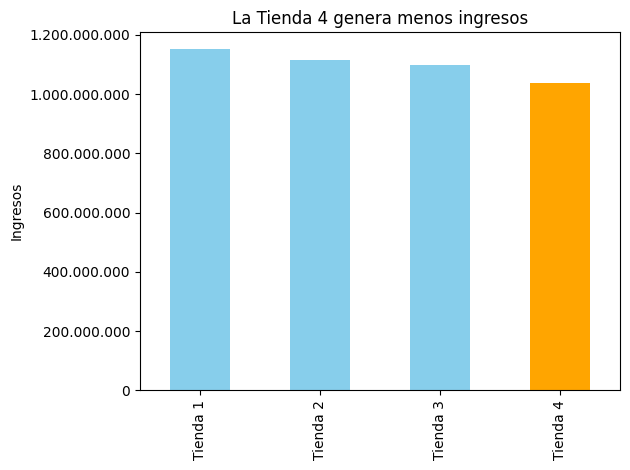

In [ ]:
# Graficamos el resultado

idx_min = df_ingresos['Ingreso Total'].idxmin()
nombreTienda = df_ingresos.loc[idx_min, 'Tiendas']
colores = ['orange' if i == idx_min else 'skyblue' for i in range(len(df_ingresos))]

# Crear la gráfica
ax = df_ingresos.plot(
    kind="bar",
    x="Tiendas",
    xlabel="",
    y="Ingreso Total",
    legend=False,  # 🔹 Quita el encabezado "Ingreso Total"
    color=colores,
    title="La "+ nombreTienda + " genera menos ingresos"
)

# Formatear los números del eje Y
ax.yaxis.set_major_formatter(plt.FuncFormatter(lambda x, _: f'{int(x):,}'.replace(',', '.')))

# Ajustes opcionales para estética
ax.set_ylabel("Ingresos")
plt.tight_layout()
plt.show()


# 2. Ventas por categoría

In [45]:

ventas_por_categorias = (
    tienda["Categoría del Producto"]
    .value_counts()
    .reset_index()
    .rename(columns={"Categoría del Producto": "Categoria", "count":"Cantidad"})
)

ventas_por_categorias

,Categoria,Cantidad
0,Muebles,465
1,Electrónicos,448
2,Juguetes,324
3,Electrodomésticos,312
4,Deportes y diversión,284
5,Instrumentos musicales,182
6,Libros,173
7,Artículos para el hogar,171


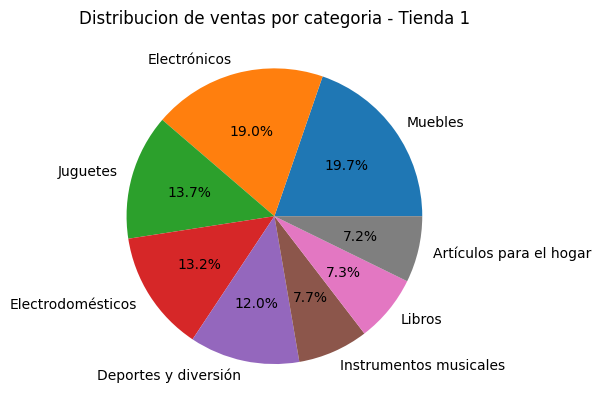

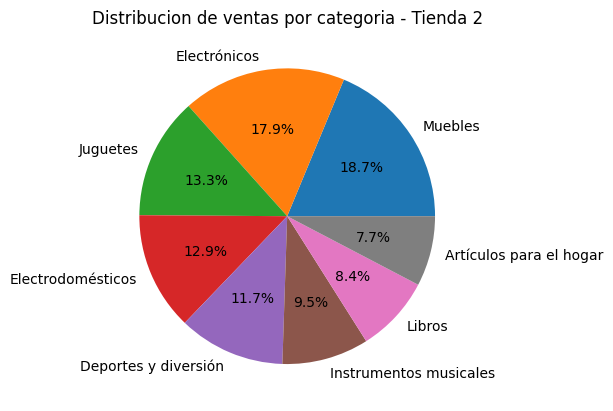

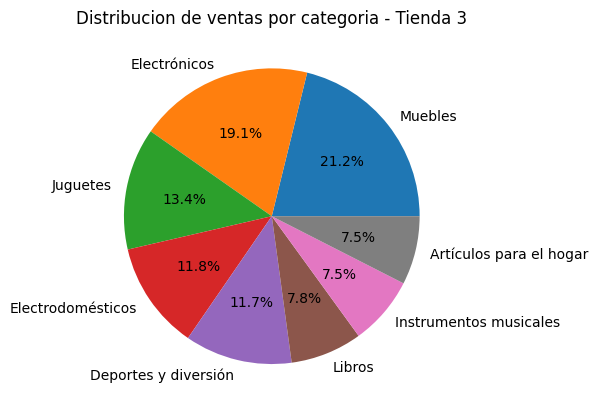

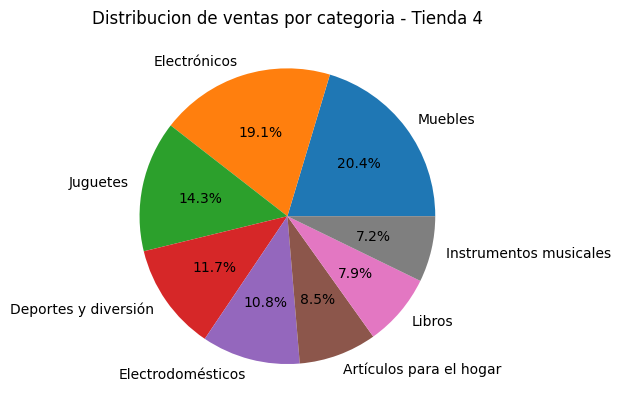

In [54]:
# Mostrar 4 graficas, resaltando las 3 categorias mas populares de cada tienda
for i,t in enumerate(tiendas, start=1):
    ventas_por_categorias = (
    t["Categoría del Producto"]
    .value_counts()
    .reset_index()
    .rename(columns={"Categoría del Producto": "Categoria", "count":"Cantidad"})
    )
    df_top = ventas_por_categorias.head(3)
    categorias_top = df_top.index.tolist()

    # Creating a pie chart
    plt.pie(x=ventas_por_categorias["Cantidad"],labels=ventas_por_categorias['Categoria'], autopct='%1.1f%%')
    plt.title('Distribucion de ventas por categoria - Tienda ' + str(i))
    plt.show()
    print("\n")
    #mostrarCategoriasPopulares(ventas_por_categorias, categorias_top, "Tienda " + str(i))

In [ ]:
def mostrarCategoriasPopulares(dataFrameCategorias, listaTop3, nombreTienda):
    colores = ["green" if cat in listaTop3 else "skyblue" for cat in dataFrameCategorias.index]
    ax = dataFrameCategorias["count"].plot(
        kind="bar",
        legend=False,
        figsize=(8,5),
        color=colores,
        title="Categorías más populares de " + nombreTienda,
        ylabel="Productos",
        xlabel=""
    )

    plt.tight_layout()
    plt.show()

# 3. Calificación promedio de la tienda


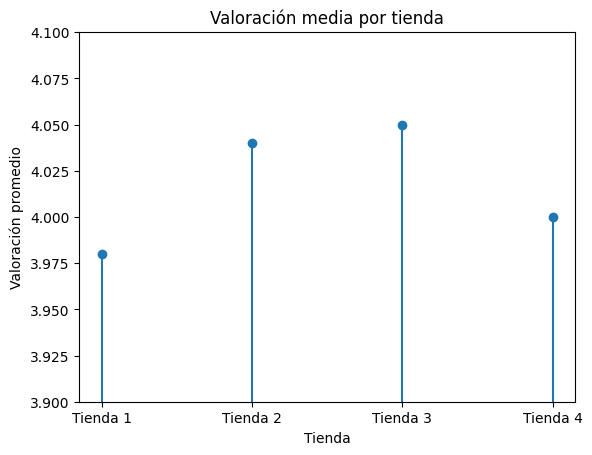

In [ ]:
# Obtenemos la media de valoracion de cada tienda
satisfaccion_por_tienda = {"Tienda " + str(i): round(t["Calificación"].mean(), 2) for i, t in enumerate(tiendas, start=1)}

# Crear un DataFrame
df = pd.DataFrame(list(satisfaccion_por_tienda.items()), columns=['Tienda', 'Valoracion'])

# Crear un gráfico de tallo (stem plot)
plt.stem(df['Tienda'], df['Valoracion'])
plt.title('Valoración media por tienda')
plt.xlabel('Tienda')
plt.ylabel('Valoración promedio')
plt.ylim(3.9, 4.1)  # opcional, para resaltar las diferencias pequeñas
plt.show()

# 4. Productos más y menos vendidos

In [67]:
producto_mas_vendido_por_tienda = {"Tienda " + str(i): pd.concat([t["Producto"].value_counts().nlargest(3), t["Producto"].value_counts().nsmallest(3)]).to_frame(name="Ventas") for i, t in enumerate(tiendas, start=1)}

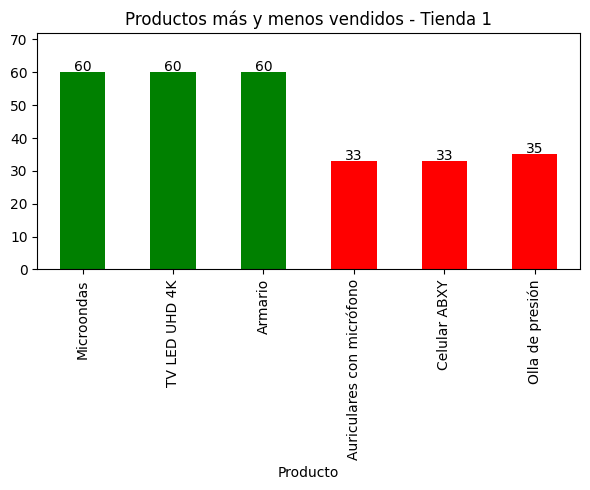

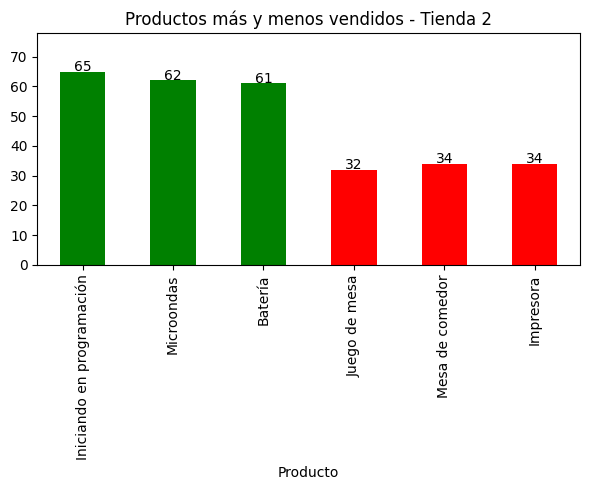

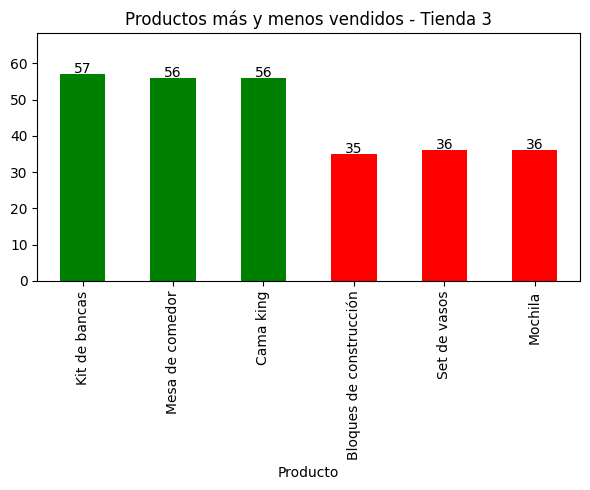

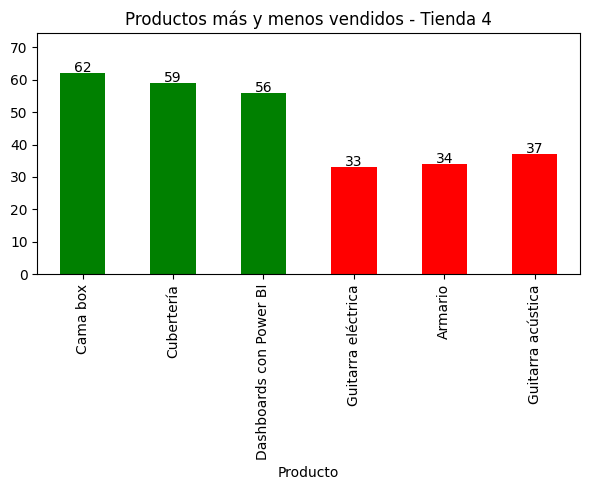

In [99]:
for t, destacados in producto_mas_vendido_por_tienda.items():
  colores = ["green"] * 3 + ["red"] * 3
  ax = destacados["Ventas"].plot(
        kind='bar',
        legend=False,
        figsize=(6,5),
        color=colores,
        title=f'Productos más y menos vendidos - {t}'
    )
  plt.tight_layout()
  plt.margins(0.2)
  for i in range(6):
    plt.text(i, destacados.iloc[i,0] + 0.3, str(destacados.iloc[i,0]), ha='center')
  plt.show()
  print("\n")

# 5. Envío promedio por tienda

In [7]:
envio_promedio_tiendas = {"Tienda " + str(i): round(float(t["Costo de envío"].mean()), 2) for i,t in enumerate(tiendas, start=1)}
envio_promedio_tiendas

{'Tienda 1': 26018.61,
 'Tienda 2': 25216.24,
 'Tienda 3': 24805.68,
 'Tienda 4': 23459.46}

In [9]:
df_promedio_envio = pd.DataFrame.from_dict({"Tiendas":envio_promedio_tiendas.keys(), "Costo envio": envio_promedio_tiendas.values()})
df_promedio_envio

,Tiendas,Costo envio
0,Tienda 1,26018.61
1,Tienda 2,25216.24
2,Tienda 3,24805.68
3,Tienda 4,23459.46


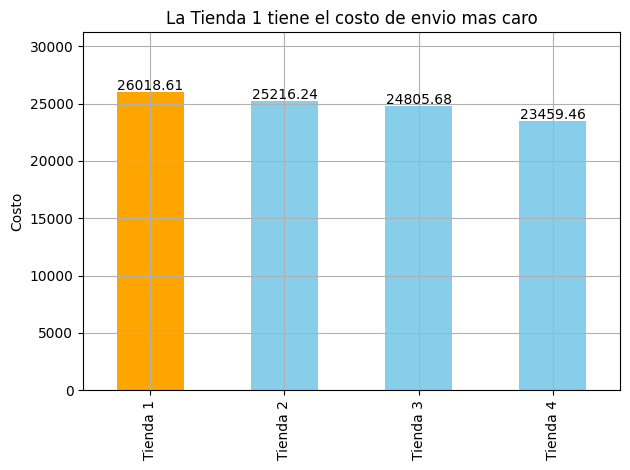

In [105]:
# Graficamos el resultado

idxmax = df_promedio_envio['Costo envio'].idxmax()
tienda_costo_alto_envio = df_promedio_envio.loc[idxmax, 'Tiendas']
colores = ['orange' if i == idxmax else 'skyblue' for i in range(len(df_promedio_envio))]

# Crear la gráfica
ax = df_promedio_envio.plot(
    kind="bar",
    x="Tiendas",
    grid=True,
    xlabel="",
    y="Costo envio",
    legend=False,  # 🔹 Quita el encabezado "Ingreso Total"
    color=colores,
    title="La "+ tienda_costo_alto_envio + " tiene el costo de envio mas caro"
)

# Ajustes opcionales para estética
ax.set_ylabel("Costo")
plt.margins(0.2)
plt.tight_layout()
for i in range(len(df_promedio_envio)):
  plt.text(i, df_promedio_envio.iloc[i, 1] + 200, str(df_promedio_envio.iloc[i, 1]), ha="center")
plt.show()